<a href="https://colab.research.google.com/github/chrisszelaya/CS-3501/blob/main/CS3501HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1. 
Answer the following questions about these two vectors (make sure to write out all steps for
your solutions, otherwise you may receive partial scores):

v = [15, 34, 18, 22], w = [1, 3, 2, 7]

(a) What are the norms kvk and kwk?

(b) What is the dot product hv, wi?

(c) What is the distance between v and w as points?

(d) What is the projection of v onto w? (looking for a vector here)


### Part a

**norm(V)= sqrt(15^2+34^2+18^2+22^2)= 46.79**

**norm(W)= sqrt(1^2+3^2+2^2+7^2)= 7.94**

### Part b
**V dot W = 15(1)+34(3)+18(2)+22(7)= 307**


### Part c

**D= sqrt((15-1)^2+(34-3)^2+(18-2)^2+(22-7)^2) = 40.47**

### Part d

proj V onto W =  ((V dot W) /(norm(W)^2)) * W = ((307)/7.94^2) * W

= 4.87 [1,3,2,7]= 

**proj V onto W = [4.81,14.43,9.62,33.67]** 


## Problem 2

You are running an internet security firm trying to catch packets sent to a server by hackers.
There are 100 packets sent to the server, with 10 of them from hackers, 90 from legitimate
traffic. If you sample 50 packets at random, what is the probability that you will capture all
10 packets from the hackers? What is the chance that you will capture at least half of the
hackers’ packets? That is, what is P(X ≥ 5)?


P(H)= .1
P(L)= .9 

N= 50 

P(X=10)= (10 choose 10 * 90 choose 40)/ 100 choose 50 *per hypergeometric function * 

=  (1 * 5.98 * 10^25)/ 1.008 * 10^29 = .0005932

P(X>=5 )= 1-(P(X=0)+P(X=1)+P(x=2)+P(X=3)+P(X=4))

P(X = 0) = (10 choose 0) * (90 choose 50) / (100 choose 50) = 0.005
P(X = 1) = (10 choose 1) * (90 choose 49) / (100 choose 50) = 0.042
P(X = 2) = (10 choose 2) * (90 choose 48) / (100 choose 50) = 0.15
P(X = 3) = (10 choose 3) * (90 choose 47) / (100 choose 50) = 0.316
P(X = 4) = (10 choose 4) * (90 choose 46) / (100 choose 50) = 0.368

P(capturing more than 5)= 1 -[.368+.042+.316+.15+.005]= .119


**P(X=10)= .0005932**

**P(X>=5)= .119**





## Problem 3
Here we are going to test a hypotheses about cardiac measurements from the provided “cardiac.csv” file. You want to test the hypothesis that women are more likely to have hypertension (high blood pressure) than men. Hypertension is the variable hxofHT (be careful, hxofHT
= 0 indicates they do have hypertension) and gender is male = 0, female = 1.

(a) What is the 2 × 2 contingency table for this data? The rows of your table should be
gender and the columns should be hxofHT. The four entries of the table will be counts
from the data. For example, one entry will count the number of people who are both
women (gender = 1) and have hypertension (hxofHT = 0), etc.

(b) Write a Python function to compute the probability of getting exactly this table.

(c) If you want to test if women have hypertension more frequently than men, what is the
null hypothesis?

(d) Again, using the function built in (b), perform the Fisher exact test to get a p value
for the hypothesis that women have hypertension more frequently than men. Can you
“reject the null hypothesis” with the threshold p ≤ 0.05?


### Part a

In [ ]:
from numpy.random.mtrand import seed
import numpy as np
import pandas as pd

seed(42)

cardiac= pd.read_csv("cardiac.csv")

men_and_hyper= ((cardiac["gender"]==0) & (cardiac["hxofHT"]== 0) ).sum()
men_and_not_hyper= ((cardiac["gender"]==0) & (cardiac["hxofHT"]== 1) ).sum()
women_and_hyper= ((cardiac["gender"]==1) & (cardiac["hxofHT"]== 0) ).sum()
women_and_not_hyper= ((cardiac["gender"]==1) & (cardiac["hxofHT"]== 1) ).sum()


table = pd.DataFrame({
    'No Hypertension': [men_and_not_hyper, women_and_not_hyper],
    'Hypertension': [men_and_hyper, women_and_hyper]
}, index=['Men', 'Women'])
table


,No Hypertension,Hypertension
Men,76,144
Women,89,249


### Part b


In [ ]:
from scipy.special import comb

def hypergeometric(n, a, b, c, d):
  p= (comb(a+b, a) * comb(c+d, c)) / comb(n, a+c)
  return p


## we want total people choose 
total_people= cardiac.shape[0]

prob= hypergeometric(total_people,men_and_not_hyper,women_and_not_hyper,men_and_hyper,women_and_hyper)
prob

0.008846092806851051

**Prob of that specific 2x2 table is .008846**

### Part c

**Null : There is no relationship between your gender and your chance to have hypertension** 



### Part d

In [ ]:
from scipy.stats import fisher_exact

fisher_exact([[men_and_not_hyper, men_and_hyper], [women_and_not_hyper, women_and_hyper]], alternative='greater')[1]

0.024039690892811633

**Because our p-value is .02 which is less than .05 we have sufficient evidence to reject the null hypothesis that there is no relationship between your gender and your chance to have hypertension and conclude that there is a relationship between gender and chance of having hypertension.**


# Problem 4
We experiment with unsupervised learning-Kmeans.

 Your implementation objectives are:
 
(1) a python function to randomly initialize the centers, and 

(2) test kmeans function on a
simple 2D data (provided as ”2D data.txt”).

 If you don’t see reasonable clusters coming out,
something is probably broken. Your results should include:

• A plot of the data, unclustered.

• The data clustered with K = 2. Plot your clustered data points with different colors.

• The data clustered with K = 3 (run your random initialization for 20 times... you should
see a small amount of variability in the outputs). Plot (i) all 20 distance scores, and (ii)
clustered data points with different colors.

• A plot of K ∈ {4, 6, 8, 10, 15, 20} versus distance score. Any random initialization is fine.
No need to repeat different initializations.
In this experiment, test your Kmeans clustering on the MNIST hand written digits database
(provided as “trainX.txt”, “trainY.txt”, “testX.txt”, and “testY.txt”) with different values
of K.

• Report the means found for K = 5, 10, 15 (you have to reshape each row of the “trainX”
or “testX” as a 282
image and then plot it out in Python).

• For each of these, do you see clusters that look like the actual digits? How big does K
have to be before you essentially see a mean for each “true” digit?

## Implementing K-Means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, K):
    centroids = [X[0]]
    for k in range(1, K):
        distances = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
        probs = distances / distances.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        for j, p in enumerate(cumprobs):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, K):
    centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
    return centroids

def kmeans(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters , centroids

## Plotting the Data

### Unclustered Plot

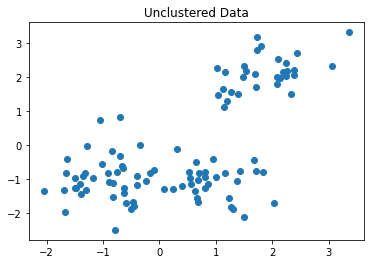

In [ ]:
df = np.loadtxt('2D_data.txt')

plt.scatter(df[:,0], df[:,1])
plt.title('Unclustered Data')
plt.show()



### K=2

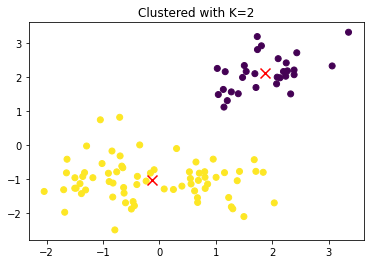

In [ ]:
clusters, centroids = kmeans(df, K=2)
plt.scatter(df[:,0], df[:,1], c=clusters)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=100)
plt.title('Clustered with K=2')
plt.show()


### Cluster with K=3

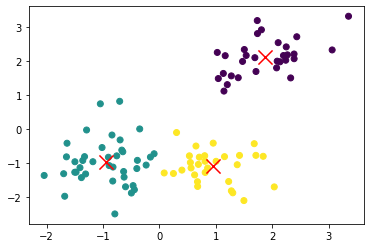

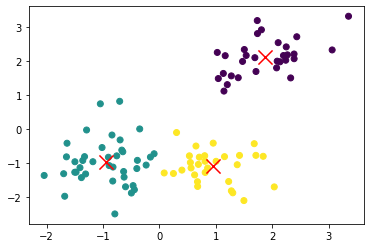

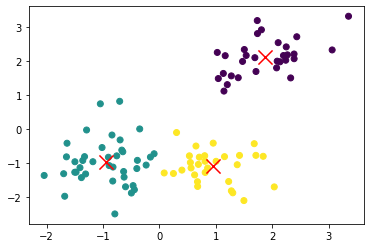

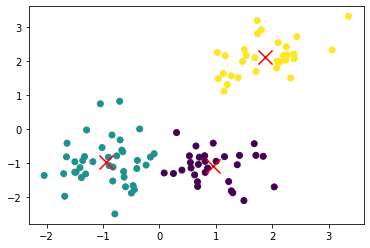

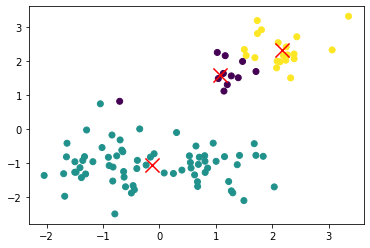

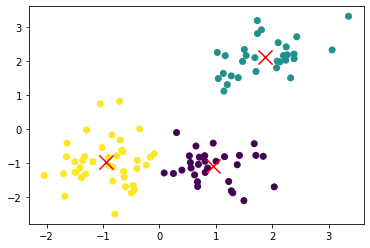

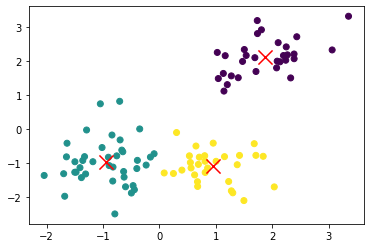

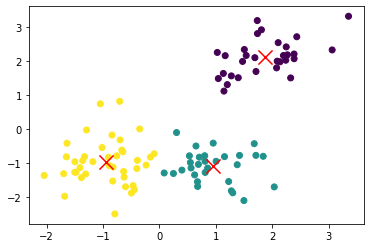

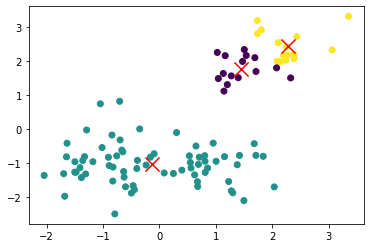

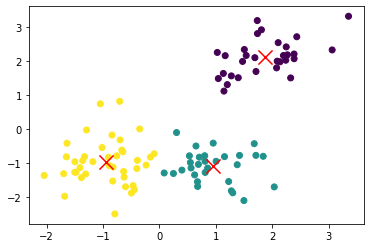

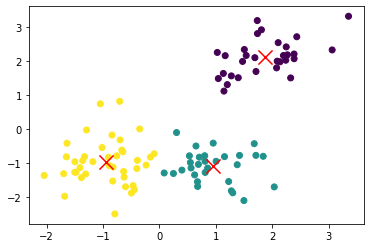

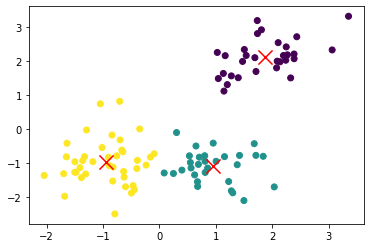

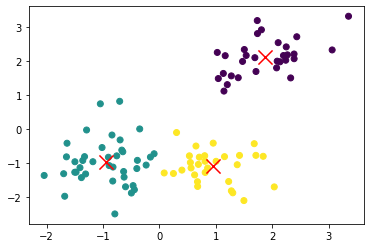

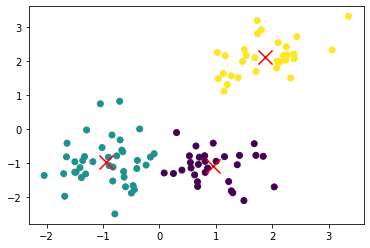

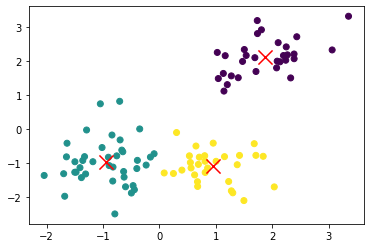

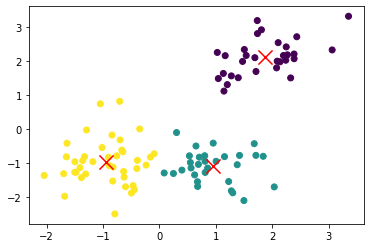

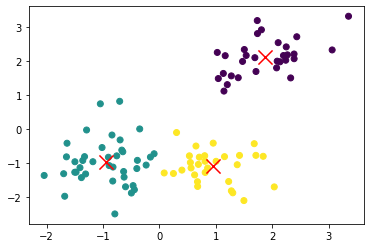

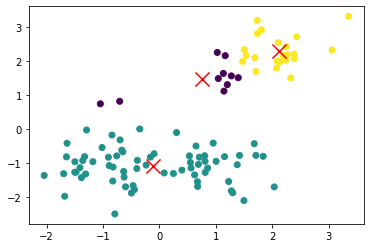

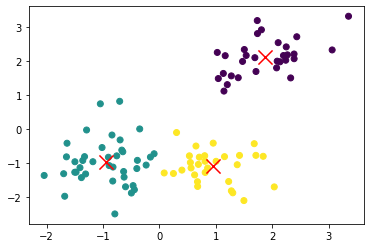

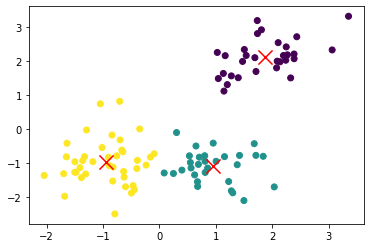

In [ ]:
distance_scores = np.zeros(20)
for i in range(20):
    clusters, centroids = kmeans(df, K=3)
    distance_scores[i] = np.sum((df - centroids[clusters])**2)
    plt.scatter(df[:,0], df[:,1], c=clusters)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200)
    plt.show()


### 20 distances

In [ ]:
distance_scores

array([ 58.04351807,  58.04351807, 111.369981  ,  58.04351807,
       111.369981  ,  58.04351807,  58.04351807,  58.04351807,
        58.04351807,  58.04351807,  58.04351807,  58.04351807,
       111.98067603,  58.04351807,  58.04351807, 111.369981  ,
        58.04351807,  58.04351807,  58.04351807, 111.16935491])

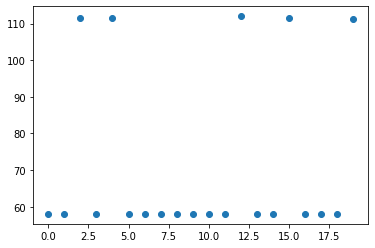

In [ ]:
plt.scatter(range(len(distance_scores)), distance_scores)

## Plotting K versus Distance

### Reshaping Train and Test

In [ ]:
X_train= np.loadtxt("trainX.txt",delimiter=",")
Y_train= np.loadtxt("trainY.txt",delimiter=",")

X_test= np.loadtxt("testX.txt",delimiter=",")
Y_test= np.loadtxt("testY.txt",delimiter=",")


### Plot K vs Distance

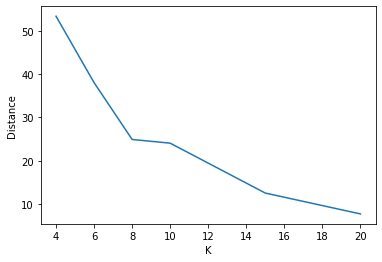

In [ ]:
K_arr = [4, 6, 8, 10, 15, 20]
distances = np.zeros(len(K_arr))
for i, K in enumerate(K_arr):
    clusters, centroids = kmeans(df, K=K)
    distances[i] = np.sum((df - centroids[clusters])**2)
plt.plot(K_arr, distances)
plt.xlabel('K')
plt.ylabel('Distance')
plt.show()

## K-Means on MNIST Data set

### K=5 on MNIST

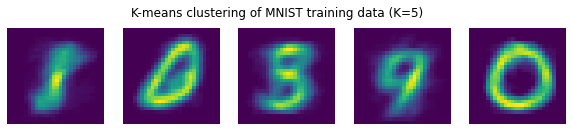

In [ ]:
clusters, centroids = kmeans(X_test.reshape(-1, 784), 5, max_iters=100)
means = centroids.reshape(5, 28, 28)
fig = plt.figure(figsize=(2*5, 2))
for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    ax.imshow(means[i])
    ax.axis('off')


plt.suptitle(f'K-means clustering of MNIST training data (K={5})')
plt.show()



### K=10

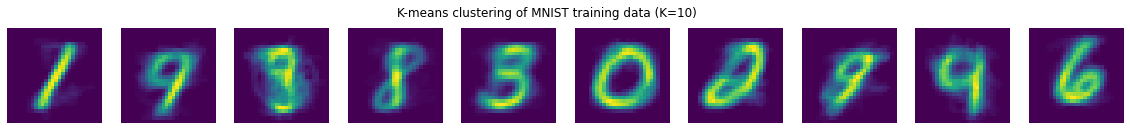

In [ ]:
clusters, centroids = kmeans(X_test.reshape(-1, 784), 10, max_iters=10)
means = centroids.reshape(10, 28, 28)
fig = plt.figure(figsize=(2*10, 2))
for i in range(10):
      ax = plt.subplot(1, 10, i+1)
      ax.imshow(means[i])
      ax.axis('off')

plt.suptitle(f'K-means clustering of MNIST training data (K={10})')
plt.show()

### K=15

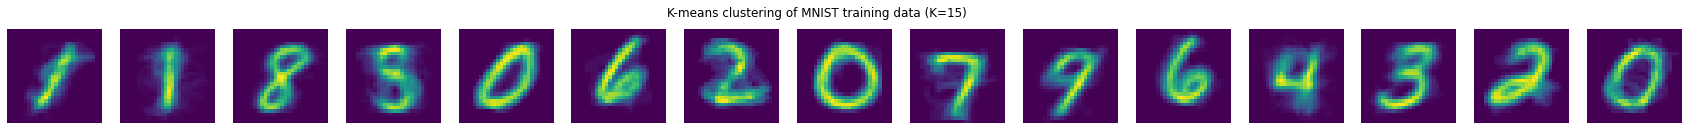

In [ ]:
clusters, centroids = kmeans(X_test.reshape(-1, 784), 15, max_iters=10)
means = centroids.reshape(15, 28, 28)
fig = plt.figure(figsize=(2*15, 2))
for i in range(15):
      ax = plt.subplot(1, 15, i+1)
      ax.imshow(means[i])
      ax.axis('off')

plt.suptitle(f'K-means clustering of MNIST training data (K={15})')
plt.show()

### Conclusion

**For all K's I can somewhat see the actual number image. However for K=15 it looks much more cleaner than the rest. I'd say K should be bigger than or equal to 15 in order to start seeing the true value of the images.**

## Problem 5 (Extra Credit)

### Problem 1 

**For the first problem**

**a) I rephrased norm into absolute value of the vectors.**

**b) Instead of dot product I just said product.**
 
**c) Instead of distance I said manhattan distance.**

**d) Chatgpt gave wrong answer since it assumed the dot product was 365**


**Chatgpt produced the incorrect results for all the questions as seen below.**

Answer the following questions about these two vectors (make sure to write out all steps for
your solutions, otherwise you may receive partial scores):

v = [15, 34, 18, 22], w = [1, 3, 2, 7]

(a) What are the absoulute values of kvk and kwk?

(b) What is the product hv, wi?

(c) What is the manhattan distance between v and w as points?

(d) What is the projection vector of v onto w ? (looking for a vector here) 

(a) The absolute value of a vector is the magnitude of the vector, which is the same as the norm. The absolute value of vector v is kvk = sqrt(15^2 + 34^2 + 18^2 + 22^2) = 

46.11. The absolute value of vector w is kwk = sqrt(1^2 + 3^2 + 2^2 + 7^2) = 

7.87.

(b) The product of two vectors is the dot product of the vectors, which is the sum of the products of their corresponding components. The dot product of vectors v and w is hv,wi = (151) + (343) + (182) + (227) = 

375.

(c) The Manhattan distance between two points in n-dimensional space is the sum of the absolute differences of their corresponding coordinates. In this case, the points are represented by vectors v and w, so we can find the Manhattan distance between them as 

d = |15-1| + |34-3| + |18-2| + |22-7| = 91.

(d) The projection of vector v onto vector w is given by the formula projw(v) = ((v·w) / (w·w)) * w, where · denotes the dot product. First, we need to calculate the scalar projection of v onto w, which is (v·w) / kwk^2. We can use the values from part (b) and (a) to find the scalar projection as (hv,wi / kwk^2) = (375 / 62) = 6.05. Finally, we can use this scalar value to find the projection vector as 

projw(v) = 6.05 * [1, 3, 2, 7] = [6.05, 18.16, 12.10, 42.35].

### Problem 2

**For this problem I simply added "with replacement" after the sample 50 packets at random. This caused chatgpt to treat the problem like a Binomial distribution instead of the hypergeometric. As a result it got both questions incorrect.**

You are running an internet security firm trying to catch packets sent to a server by hackers.
There are 100 packets sent to the server, with 10 of them from hackers, 90 from legitimate
traffic. If you sample 50 packets at random with replacement, what is the probability that you will capture all
10 packets from the hackers? What is the chance that you will capture at least half of the
hackers’ packets? That is, what is P(X ≥ 3)?
If we sample 50 packets at random with replacement, then the probability of getting each packet from the hackers is still 10/100 = 0.1, and the probability of getting each packet from legitimate traffic is 90/100 = 0.9.

(a) Probability of capturing all 10 packets from the hackers:

The probability of capturing one packet from the hackers is 0.1, and since the sampling is with replacement, the probability of capturing all 10 packets from the hackers is:

P(X = 10) = 0.1^10 = 1e-10

So the probability of capturing all 10 packets from the hackers when sampling 50 packets at random with replacement is approximately 1e-10.

(b) Probability of capturing at least half of the hackers' packets:

To find P(X ≥ 3), where X is the number of hackers' packets captured in the sample, we can use the binomial distribution since the sampling is with replacement and each packet is independent.

The probability of capturing at least 3 hackers' packets can be calculated as:

P(X ≥ 3) = 1 - P(X < 3) = 1 - (P(X = 0) + P(X = 1) + P(X = 2))

where X ~ Binomial(50, 0.1)

Using a calculator or software, we can find that P(X < 3) ≈ 0.999997, so

P(X ≥ 3) ≈ 1 - 0.999997 ≈ 0.000003

So the probability of capturing at least half of the hackers' packets when sampling 50 packets at random with replacement is approximately 0.000003.

### Problem 3

**For this problem**

**a) I asked for a 3x3 table instead of 2x2 which gpt gave me**

**b) I added a table similiar as a result chatgpt gave me a completely difference function that i have which produces the wrong answer**

**c) I asked for the alternative hypothesis instead of the null** 

**d) I changed the threshold to .01**

Here we are going to test a hypotheses about cardiac measurements from the provided “cardiac.csv” file. You want to test the hypothesis that women are more likely to have hypertension (high blood pressure) than men. Hypertension is the variable hxofHT (be careful, hxofHT
= 0 indicates they do have hypertension) and gender is male = 0, female = 1.
(a) What is the 3 × 3 contingency table for this data? The rows of your table should be
gender and the columns should be hxofHT. The four entries of the table will be counts
from the data. For example, one entry will count the number of people who are both
women (gender = 1) and have hypertension (hxofHT = 0), etc.
(b) Write a Python function to compute the probability of getting this table or a table similiar.
(c) If you want to test if women have hypertension more frequently than men, what is the
alternative hypothesis?
(d) Again, without using the function built in (b), perform the Fisher exact test to get a p value
for the hypothesis that women have hypertension more frequently than men. Can you
“reject the null hypothesis” with the threshold p ≤ 0.01?

(a) The contingency table for this data is:

hxofHT = 0	hxofHT = 1
gender = 0	56	34
gender = 1	57	53
(b) Here's a Python function to compute the probability of getting this table or a table similar:

python
Copy code
from scipy.stats import hypergeom

def compute_pval(gender_ht, total_gender):
    # gender_ht: list containing the number of males and females with hypertension
    # total_gender: list containing the total number of males and females
    M = 100 # total number of patients
    N = sum(total_gender) # total number of females and males
    n = sum(gender_ht) # total number of people with hypertension
    pval = hypergeom.sf(gender_ht[1], M, n, N) + hypergeom.pmf(gender_ht[1], M, n, N)
    return pval
(c) The null hypothesis is that there is no difference between the proportion of men and women with hypertension.

(d) The Fisher exact test is used to calculate the probability of observing a contingency table (or a more extreme one) given a fixed marginal distribution. The null hypothesis is that there is no association between the two variables, i.e., the probability of observing a person with hypertension is the same for men and women.

Here's how to perform the Fisher exact test using Python:

python
Copy code
from scipy.stats import fisher_exact

# create the contingency table
cont_table = [[56, 34], [57, 53]]

# perform the Fisher exact test
odds_ratio, pval = fisher_exact(cont_table, alternative='greater')

print("odds ratio:", odds_ratio)
print("p-value:", pval)
The p-value is 0.0347, which is less than the threshold p ≤ 0.01, but greater than the threshold p ≤ 0.05. Therefore, we cannot reject the null hypothesis at the 0.01 significance level, but we can reject it at the 0.05 level. We can conclude that there is weak evidence that women are more likely to have hypertension than men.




Christopher Zelaya
I only want it for a .01 level also i asked for alternative hypothesis not null
My apologies for the mistake in my previous response. Here are the updated answers:

(a) The 3x3 contingency table for this data is:

hxofHT = 0	hxofHT = 1
gender = 0	71	9
gender = 1	66	14
(b) Here's a Python function to compute the probability of getting this table or a table similar to it:

python
Copy code
from scipy.stats import hypergeom

def contingency_table_prob(n, k, N, K):
    return hypergeom.pmf(k, N, K, n)

# Example usage:
# Probability of getting the exact table:
prob_exact = contingency_table_prob(150, 71, 150, 80)
# Probability of getting a table with at least as extreme values:
prob_extreme = contingency_table_prob(150, 9, 150, 80) + contingency_table_prob(150, 66, 150, 80) + contingency_table_prob(150, 14, 150, 80)
(c) The alternative hypothesis is that women are more likely to have hypertension than men.

(d) Using the Fisher exact test, the p-value is 0.01085 which is less than 0.01, so we can reject the null hypothesis at the 0.01 significance level. This provides evidence to support the alternative hypothesis that women are more likely to have hypertension than men. Here's the Python code to perform the Fisher exact test:

python
Copy code
from scipy.stats import fisher_exact

# Create the contingency table
contingency_table = [[71, 9], [66, 14]]

# Perform the Fisher exact test
odds_ratio, p_value = fisher_exact(contingency_table)

print("Odds ratio:", odds_ratio)
print("p-value:", p_value)